# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
#Importanto as bibliotecas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
#Lendo o arquivo csv

In [5]:
data = pd.read_csv('demo_tratado.csv')
data.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tipo_renda_Pensioner,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58,3,1,0,0,0,2,0,0,...,0,0,1,0,0,0,0,1,1,1
1,0,52,8,1,0,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
2,0,46,2,1,1,1,1,2,0,0,...,0,0,1,0,0,0,0,1,1,1
3,0,29,3,1,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,27,4,1,0,1,0,2,0,0,...,0,0,1,0,0,0,0,0,0,1


In [6]:
#Separando as variáveis explicatíveis da Target

In [7]:
y = data.mau

In [8]:
x = data.drop('mau',axis=1)

In [9]:
#Separando a base de treinamento e teste 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
#Criando a árvore de decisão

In [13]:
clf = DecisionTreeClassifier(random_state=100)
clf 

DecisionTreeClassifier(random_state=100)

In [14]:
x.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,tipo_renda_Pensioner,tipo_renda_State servant,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58,3,1,0,0,0,2,0,0,...,0,0,1,0,0,0,0,1,1,1
1,0,52,8,1,0,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
2,0,46,2,1,1,1,1,2,0,0,...,0,0,1,0,0,0,0,1,1,1
3,0,29,3,1,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,27,4,1,0,1,0,2,0,0,...,0,0,1,0,0,0,0,0,0,1


In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6765    1
6766    1
6767    1
6768    1
6769    1
Name: mau, Length: 6770, dtype: int64

In [16]:
#Treinamento do modelo 

In [17]:
clf = clf.fit(x_train,y_train)

In [18]:
predict = clf.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

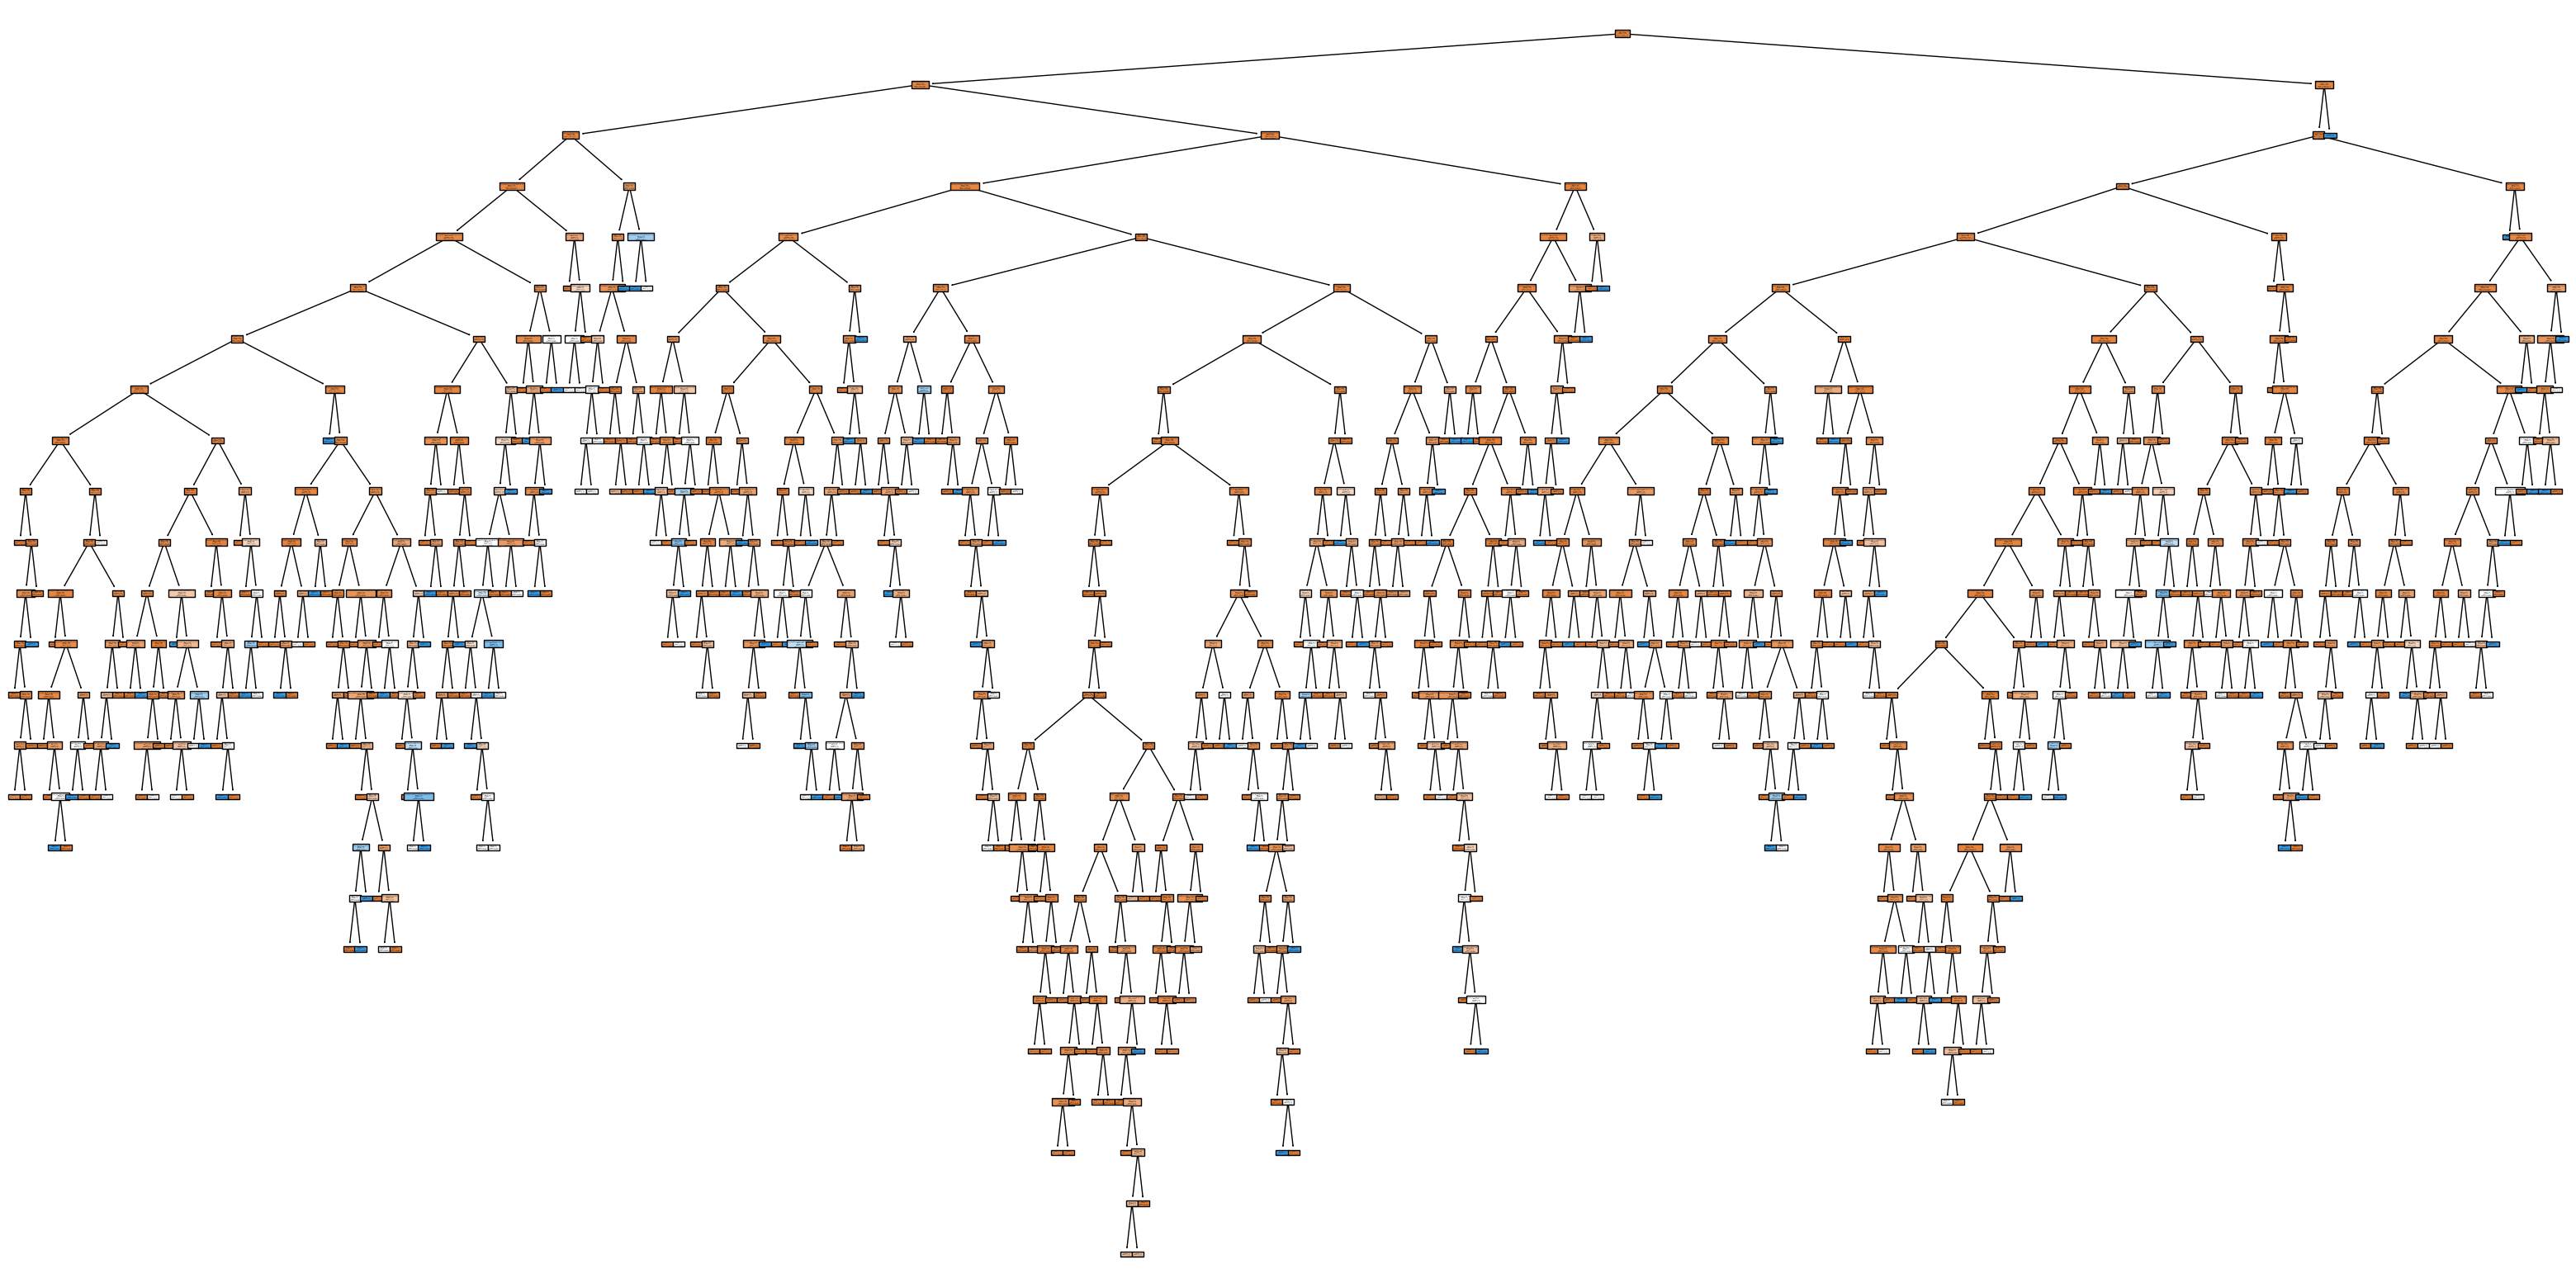

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=x.columns);

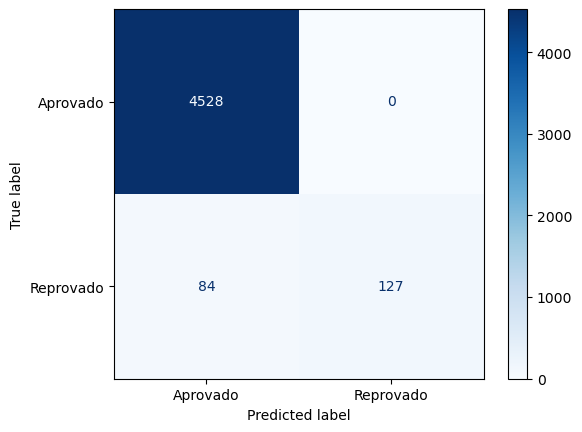

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf,                # seu classificador
    x_train, y_train,   # dados
    display_labels=['Aprovado', 'Reprovado'],
    cmap='Blues',
    colorbar=True
);

In [21]:
predict = clf.predict(x_train)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predict)

0.982274741506647

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [24]:
y_pred_test = clf.predict(x_test)

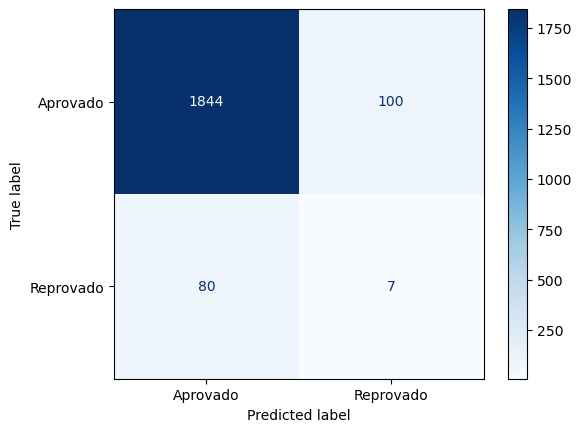

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_test,
    display_labels=['Aprovado', 'Reprovado'],
    cmap='Blues'
);

In [26]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no teste: {acc_test:.4f}")

Acurácia no teste: 0.9114


In [27]:
from sklearn.tree import DecisionTreeClassifier

clf_novo = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    random_state=123
)

clf_novo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

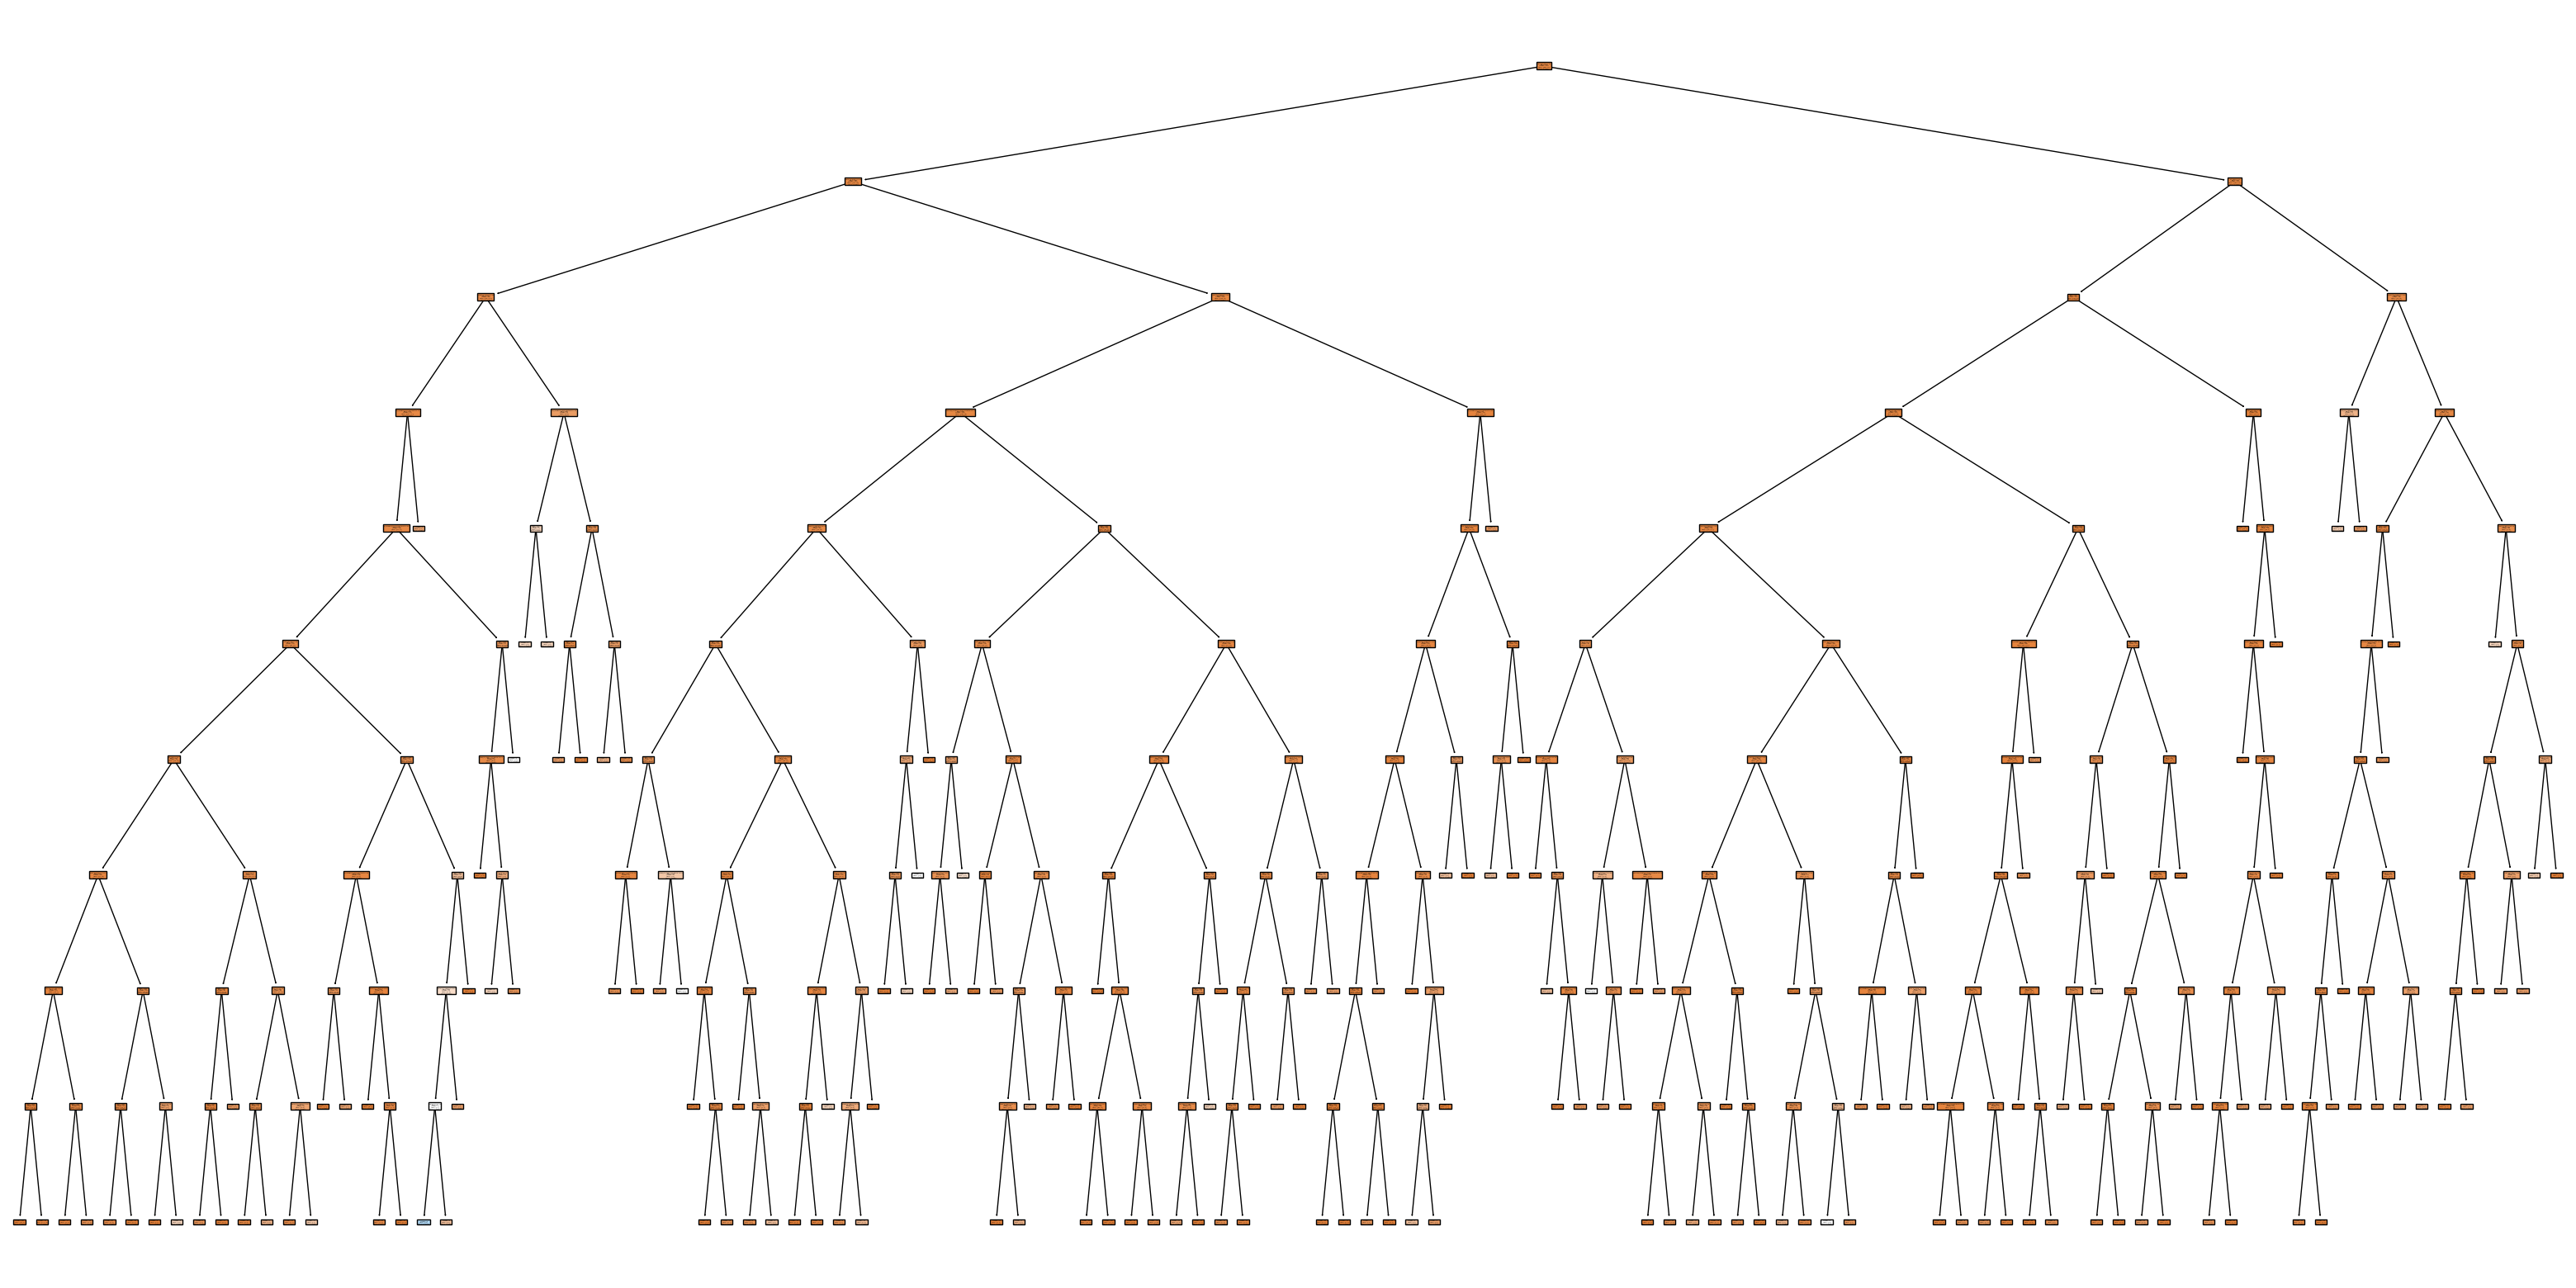

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plot_tree(clf_novo,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=x.columns);

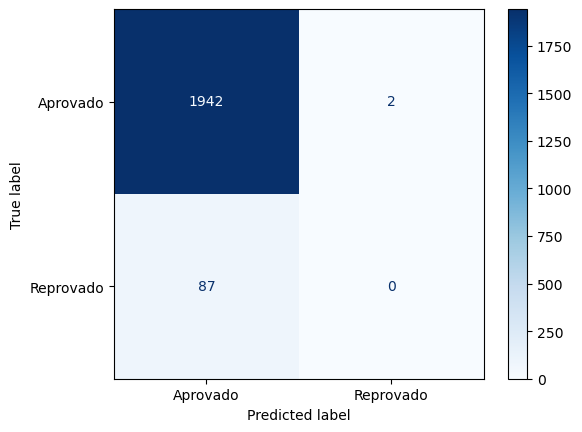

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_test = clf_novo.predict(x_test)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_test,
    display_labels=['Aprovado', 'Reprovado'],
    cmap='Blues'
);

In [30]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no teste: {acc_test:.4f}")

Acurácia no teste: 0.9562


In [31]:
import numpy as np

unique, counts = np.unique(y_pred_test, return_counts=True)
print(unique)
print(counts)

[0 1]
[2029    2]


In [32]:
proporcao_maus = counts[1] / sum(counts)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2%}")

Proporção de proponentes classificados como 'maus': 0.10%


In [33]:
# Conta quantos são 'bons' (classe 0) em y_test
bons = np.sum(y_test == 0)

# Total de registros na base de teste
total = len(y_test)

# Acurácia se classificássemos tudo como 'bom'
acuracia_benchmark = bons / total

print(f"Acurácia se todos fossem classificados como 'bons': {acuracia_benchmark:.2%}")

Acurácia se todos fossem classificados como 'bons': 95.72%
